# Violence against women and girls

> "A higher proportion of women than men think that violence against them can be justified." 
[Source](https://public.tableau.com/profile/operation.fistula6589#!/vizhome/Internationaldayfortheeliminationofviolenceagainstwomen/Violenceagainstwomen)

[@Eva Murray](https://data.world/evamurray) have published a dataset on [data.world](https://data.world/makeovermonday/2020w10) displaying what women and men thinks about violence against women.

Original publish date: November 25th, 2019

Last updated: March 8th, 2020

Accessed: November, 2020


The dataset is publicly available at [data.world/dataset](https://data.world/makeovermonday/2020w10/workspace/file?filename=20200306+Data+International+Women%27s+Day+Viz5+Launch.csv)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from scipy import stats
import seaborn as sns
sns.set()
plt.rcParams["figure.dpi"] = 300
#plt.rcParams["savefig.dpi"] = 300

df = pd.read_csv('https://query.data.world/s/mkjaumem4rmiobndsks4zd34uzd5kr')

# About the data

The data is collected by the Demographic and Health Surveys (DHS) Program, which has the purpose to advance the global understandning of health and populuation in developing countries.

The geographical target areas are, Africa, Asia and South America across 70 countries in total.


__Explain all features below__
Name, type, desc

# Preprocessing


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12600 entries, 0 to 12599
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   RecordID               12600 non-null  int64  
 1   Country                12600 non-null  object 
 2   Gender                 12600 non-null  object 
 3   Demographics Question  12600 non-null  object 
 4   Demographics Response  12600 non-null  object 
 5   Question               12600 non-null  object 
 6   Survey Year            12600 non-null  object 
 7   Value                  11187 non-null  float64
dtypes: float64(1), int64(1), object(6)
memory usage: 787.6+ KB


In [3]:
print("The dataset consists of {:} rows and {:} columns.".format(df.shape[0], df.shape[1]))

The dataset consists of 12600 rows and 8 columns.


#### Overview of data types

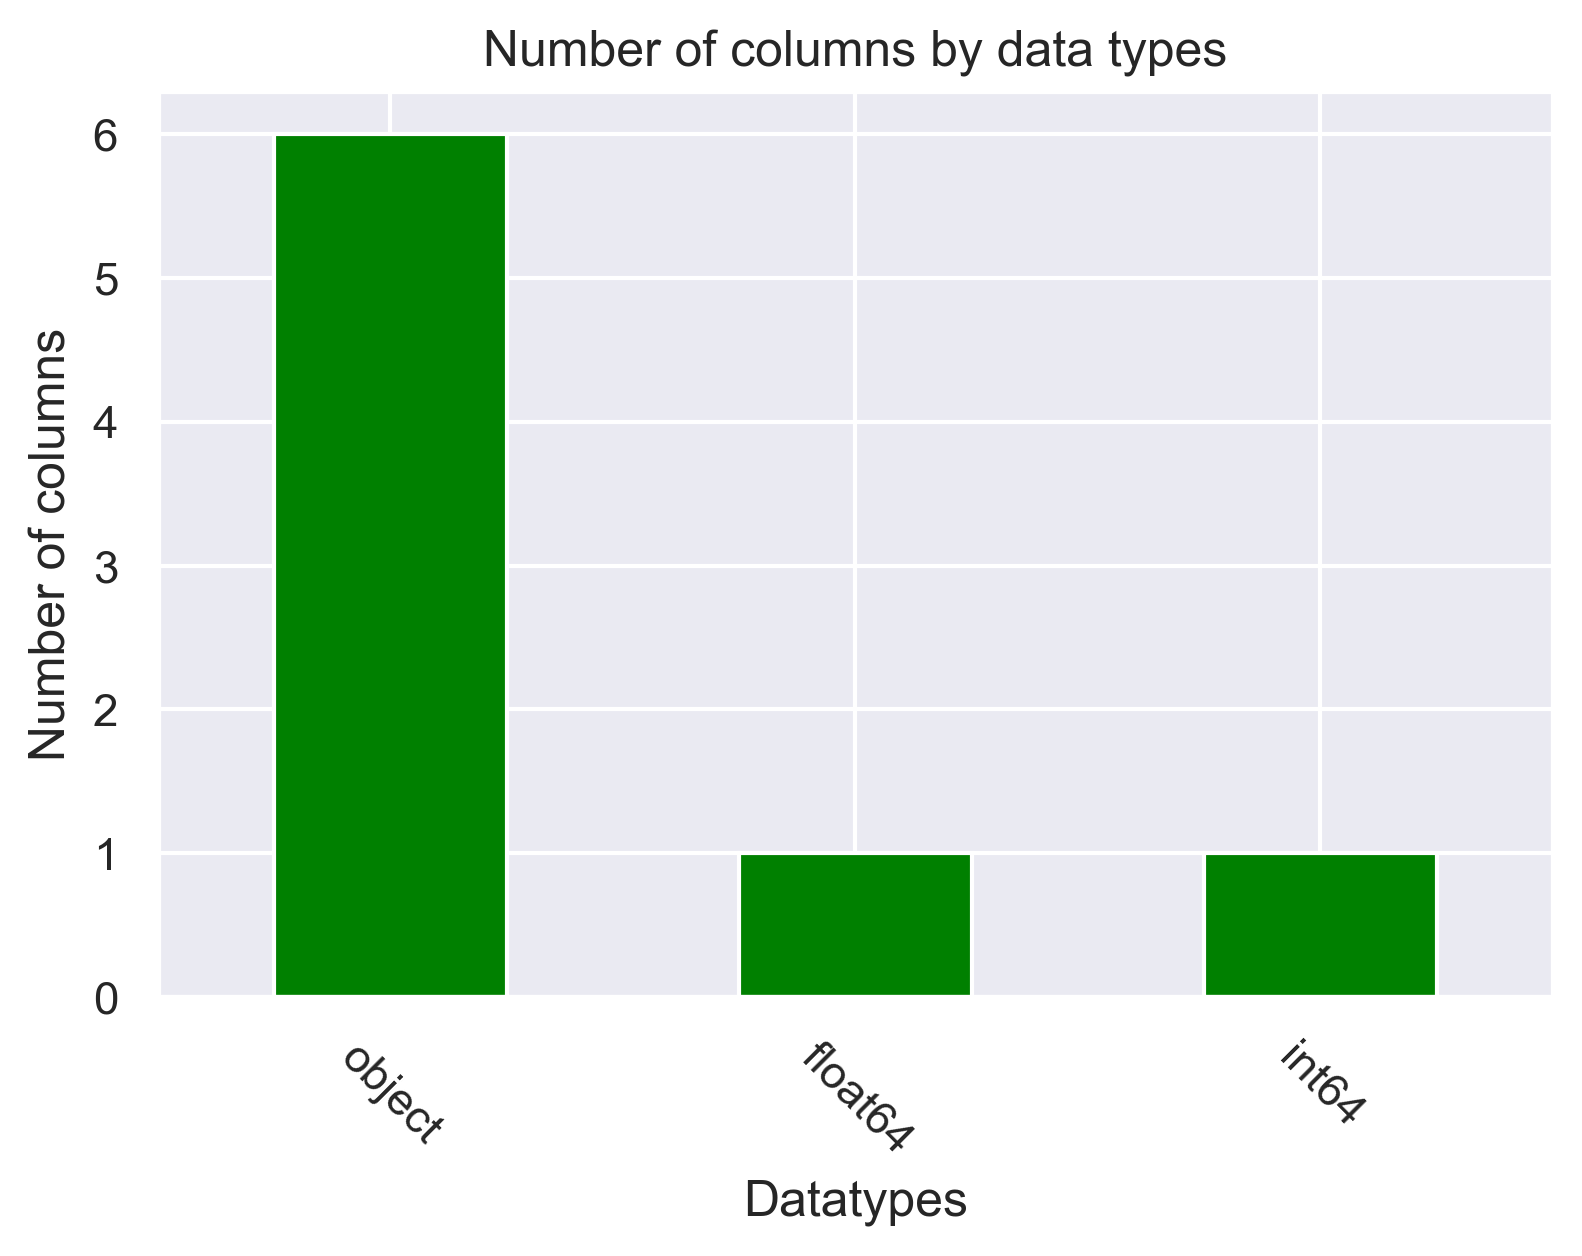

In [4]:
barplot = df.dtypes.value_counts().plot.bar(color="green");
plt.title("Number of columns by data types")
plt.xlabel("Datatypes")
plt.ylabel("Number of columns")
plt.xticks(rotation=-45)
plt.show(barplot)

## Look at NA values

By looking at the dataframe info, it shows the value - the percentage of agreement of violence, have null values.

In [5]:
df[df["Value"].isna()]["Question"].value_counts()

... if she burns the food                  271
... if she argues with him                 271
... if she refuses to have sex with him    238
... if she neglects the children           211
... if she goes out without telling him    211
... for at least one specific reason       211
Name: Question, dtype: int64

Showing countries and question where value is N/A

In [6]:
df[df["Value"].isna()]["Country"].value_counts()

Turkey                   102
Egypt                     96
Bangladesh                96
Tajikistan                90
Yemen                     90
Turkmenistan              90
Morocco                   90
Eritrea                   90
Peru                      90
Bolivia                   90
Nicaragua                 90
Philippines               90
Congo                     60
Maldives                  60
Jordan                    45
Ukraine                   24
Kyrgyz Republic           18
Moldova                   18
Pakistan                  12
Afghanistan               12
Azerbaijan                12
Indonesia                 12
Armenia                   12
Dominican Republic        12
South Africa               6
Sao Tome and Principe      6
Name: Country, dtype: int64

These results shows that some countries have half and more than half of their responses not tracked. These countries will be dropped in order to have a more uniform dataset.

Will drop all countries were the occurences of missing values are more than 20% occurences of countries.

In [7]:
occurence_country = df["Country"].value_counts().mean()
prune_countries = df[df["Value"].isna()]["Country"].value_counts() > occurence_country*0.2
removals = prune_countries[prune_countries == True].index
removals
df = df[~df["Country"].isin(removals)]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9900 entries, 0 to 12599
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   RecordID               9900 non-null   int64  
 1   Country                9900 non-null   object 
 2   Gender                 9900 non-null   object 
 3   Demographics Question  9900 non-null   object 
 4   Demographics Response  9900 non-null   object 
 5   Question               9900 non-null   object 
 6   Survey Year            9900 non-null   object 
 7   Value                  9756 non-null   float64
dtypes: float64(1), int64(1), object(6)
memory usage: 696.1+ KB


Countries with NA values, but are kept.

In [8]:
kept = prune_countries[prune_countries == False].index
for k in kept.sort_values():
  print(k)

Afghanistan
Armenia
Azerbaijan
Dominican Republic
Indonesia
Kyrgyz Republic
Moldova
Pakistan
Sao Tome and Principe
South Africa
Ukraine


Remove the rows with NA value. As seen above, only the column *Value* have NA values.

In [9]:
df = df.dropna(axis=0, how='any')

Complete dataset without any NA values.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9756 entries, 1 to 12599
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   RecordID               9756 non-null   int64  
 1   Country                9756 non-null   object 
 2   Gender                 9756 non-null   object 
 3   Demographics Question  9756 non-null   object 
 4   Demographics Response  9756 non-null   object 
 5   Question               9756 non-null   object 
 6   Survey Year            9756 non-null   object 
 7   Value                  9756 non-null   float64
dtypes: float64(1), int64(1), object(6)
memory usage: 686.0+ KB


Looking for any empty strings

In [11]:
numEmpty = (df.select_dtypes(include=["object"]) == "").sum().sum()
print("Number of empty strings: {}".format(numEmpty))

Number of empty strings: 0


No empty string found.

Verify that it is no NA values left in the dataset.

In [12]:
# Verify no na values
print("Number of NA values: \n{}.".format(df.isna().sum()))

Number of NA values: 
RecordID                 0
Country                  0
Gender                   0
Demographics Question    0
Demographics Response    0
Question                 0
Survey Year              0
Value                    0
dtype: int64.


Convert to correct datatypes, set index as panda time, update gender column to 0 and 1 representing male and female respectively and validate no NA values.

In [13]:
# Set index to survey year, to easilier deal with time calculations
# and sorting
df = df.set_index(pd.to_datetime(df['Survey Year']))

# Dropping survey year since its now the index
#df = df.drop(columns=["Survey Year"])

# Converting gender from string representation to int, Male=0, Female=1
df["Gender"] = (df["Gender"] == 'F').astype(int)

# Convert object to string
df = df.convert_dtypes()

df["Survey"] = df.index.year


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9756 entries, 2015-01-01 to 2015-01-01
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   RecordID               9756 non-null   Int64  
 1   Country                9756 non-null   string 
 2   Gender                 9756 non-null   Int64  
 3   Demographics Question  9756 non-null   string 
 4   Demographics Response  9756 non-null   string 
 5   Question               9756 non-null   string 
 6   Survey Year            9756 non-null   string 
 7   Value                  9756 non-null   float64
 8   Survey                 9756 non-null   int64  
dtypes: Int64(2), float64(1), int64(1), string(5)
memory usage: 781.2 KB


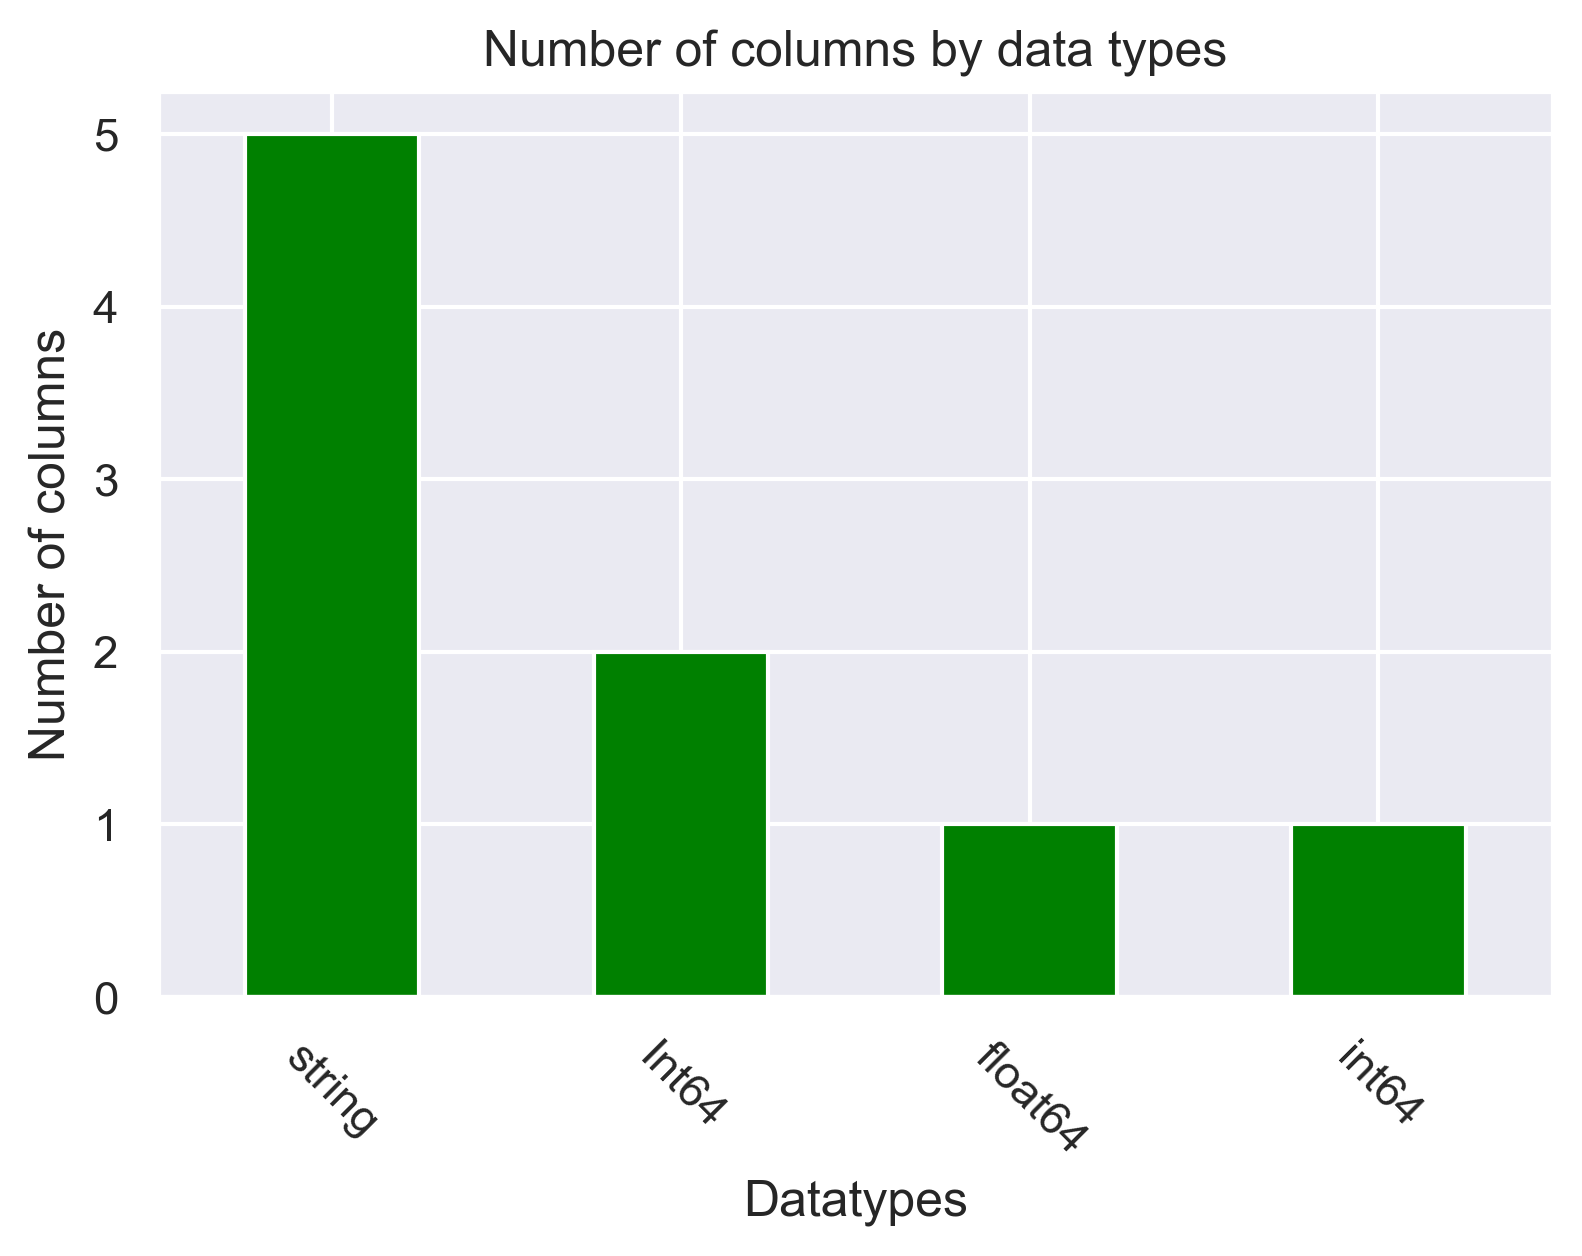

In [15]:
barplot = df.dtypes.value_counts().plot.bar(color="green");
plt.title("Number of columns by data types")
plt.xlabel("Datatypes")
plt.ylabel("Number of columns")
plt.xticks(rotation=-45)
plt.show(barplot)

## Conclusion of data cleaning

Some countries in this dataset are not well represented with their survey results. In order to have more of a uniform dataset to work with, these countries have been dropped.

In [16]:
print("Countries dropped: \n")
for country in removals.sort_values():
  print(country)

Countries dropped: 

Bangladesh
Bolivia
Congo
Egypt
Eritrea
Jordan
Maldives
Morocco
Nicaragua
Peru
Philippines
Tajikistan
Turkey
Turkmenistan
Yemen


Working with a dataset it is important to get to know the dataset. This includes number of rows, columns, representation of elements and datatypes. Data representation will follow in the next section. Final results of the cleaned dataset is as follows:

In [17]:
print("The dataset consists of {:} rows and {:} columns.".format(df.shape[0], df.shape[1]))

The dataset consists of 9756 rows and 9 columns.


In [18]:
print("Datatypes: {}".format([print(l) for l in df.dtypes.value_counts().index.unique()]))


string
Int64
float64
int64
Datatypes: [None, None, None, None]


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9756 entries, 2015-01-01 to 2015-01-01
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   RecordID               9756 non-null   Int64  
 1   Country                9756 non-null   string 
 2   Gender                 9756 non-null   Int64  
 3   Demographics Question  9756 non-null   string 
 4   Demographics Response  9756 non-null   string 
 5   Question               9756 non-null   string 
 6   Survey Year            9756 non-null   string 
 7   Value                  9756 non-null   float64
 8   Survey                 9756 non-null   int64  
dtypes: Int64(2), float64(1), int64(1), string(5)
memory usage: 781.2 KB


# Explore data


In [20]:
df[(df["Country"] == "Afghanistan") & (df["Question"] == "... for at least one specific reason") & (df["Gender"] == 1)].describe()

RecordID  Gender      Value  Survey
count      14.0    14.0  14.000000    14.0
mean      351.0     1.0  77.857143  2015.0
std         0.0     0.0   6.536373     0.0
min       351.0     1.0  61.100000  2015.0
25%       351.0     1.0  76.750000  2015.0
50%       351.0     1.0  80.100000  2015.0
75%       351.0     1.0  80.900000  2015.0
max       351.0     1.0  86.900000  2015.0

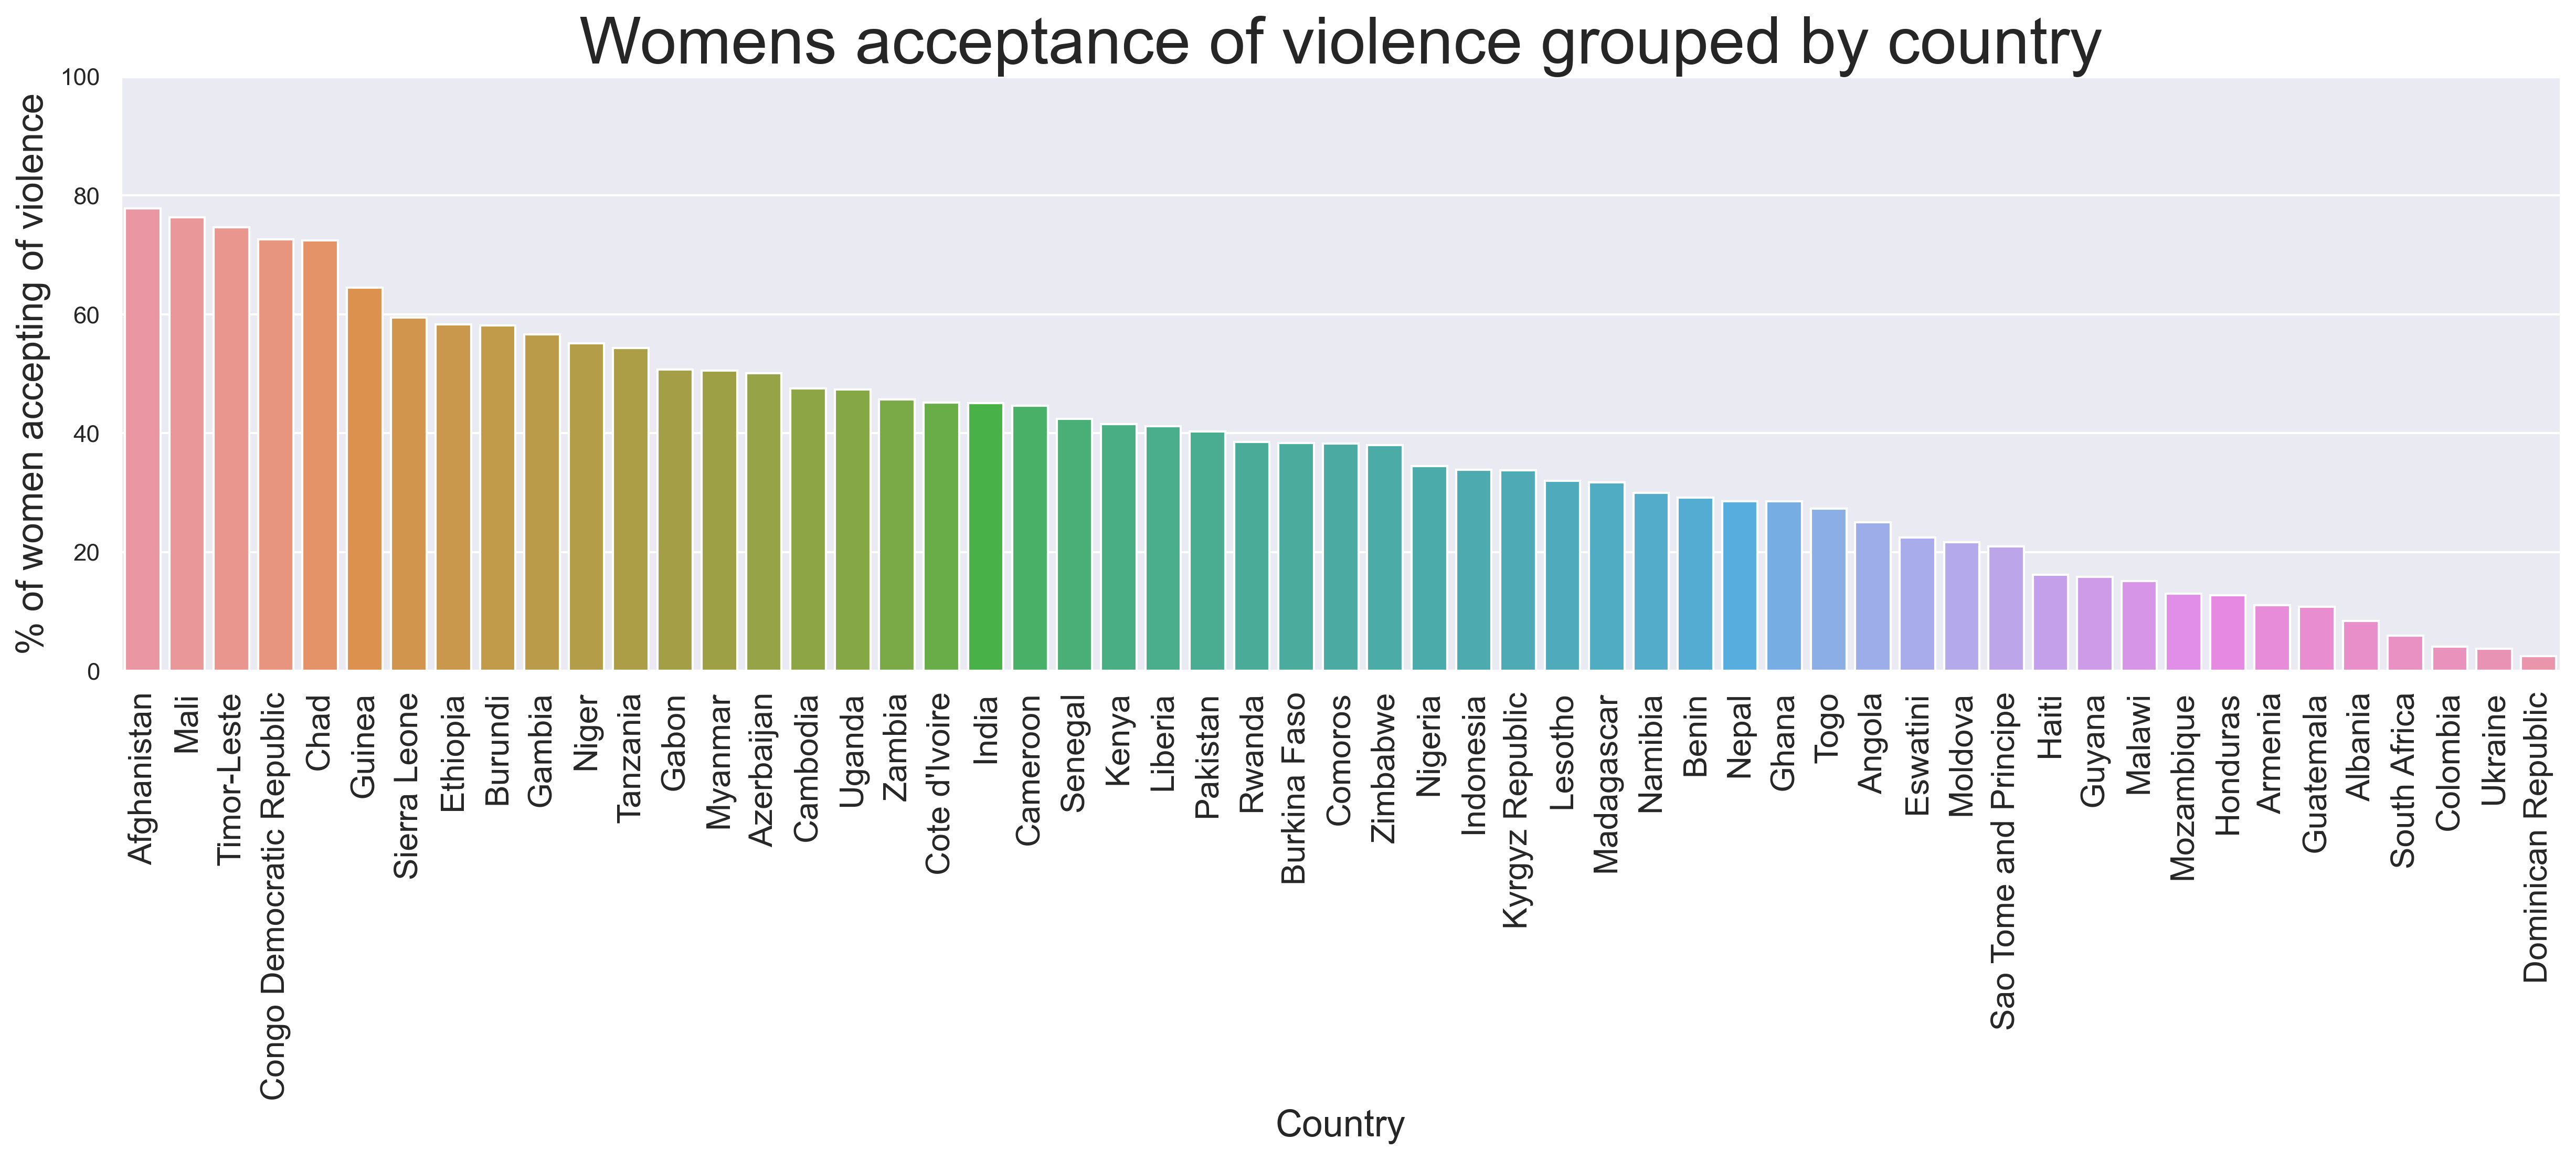

In [21]:
data = df[(df["Question"]  == "... for at least one specific reason") & (df["Gender"] == 1)].groupby("Country")["Value"].mean().reset_index()

data.head()
sort = data.sort_values(by=["Value"], ascending=False)

plt.figure(figsize=(20,5))
ax = sns.barplot(x="Country", y="Value", data=sort, ci=None)
plt.title("Womens acceptance of violence grouped by country", size="30");
plt.ylabel("% of women accepting of violence", size="17");
plt.ylim(0,100);
plt.xlabel("Country", size="17"); 
plt.xticks(rotation=90, size="15")
plt.show() 

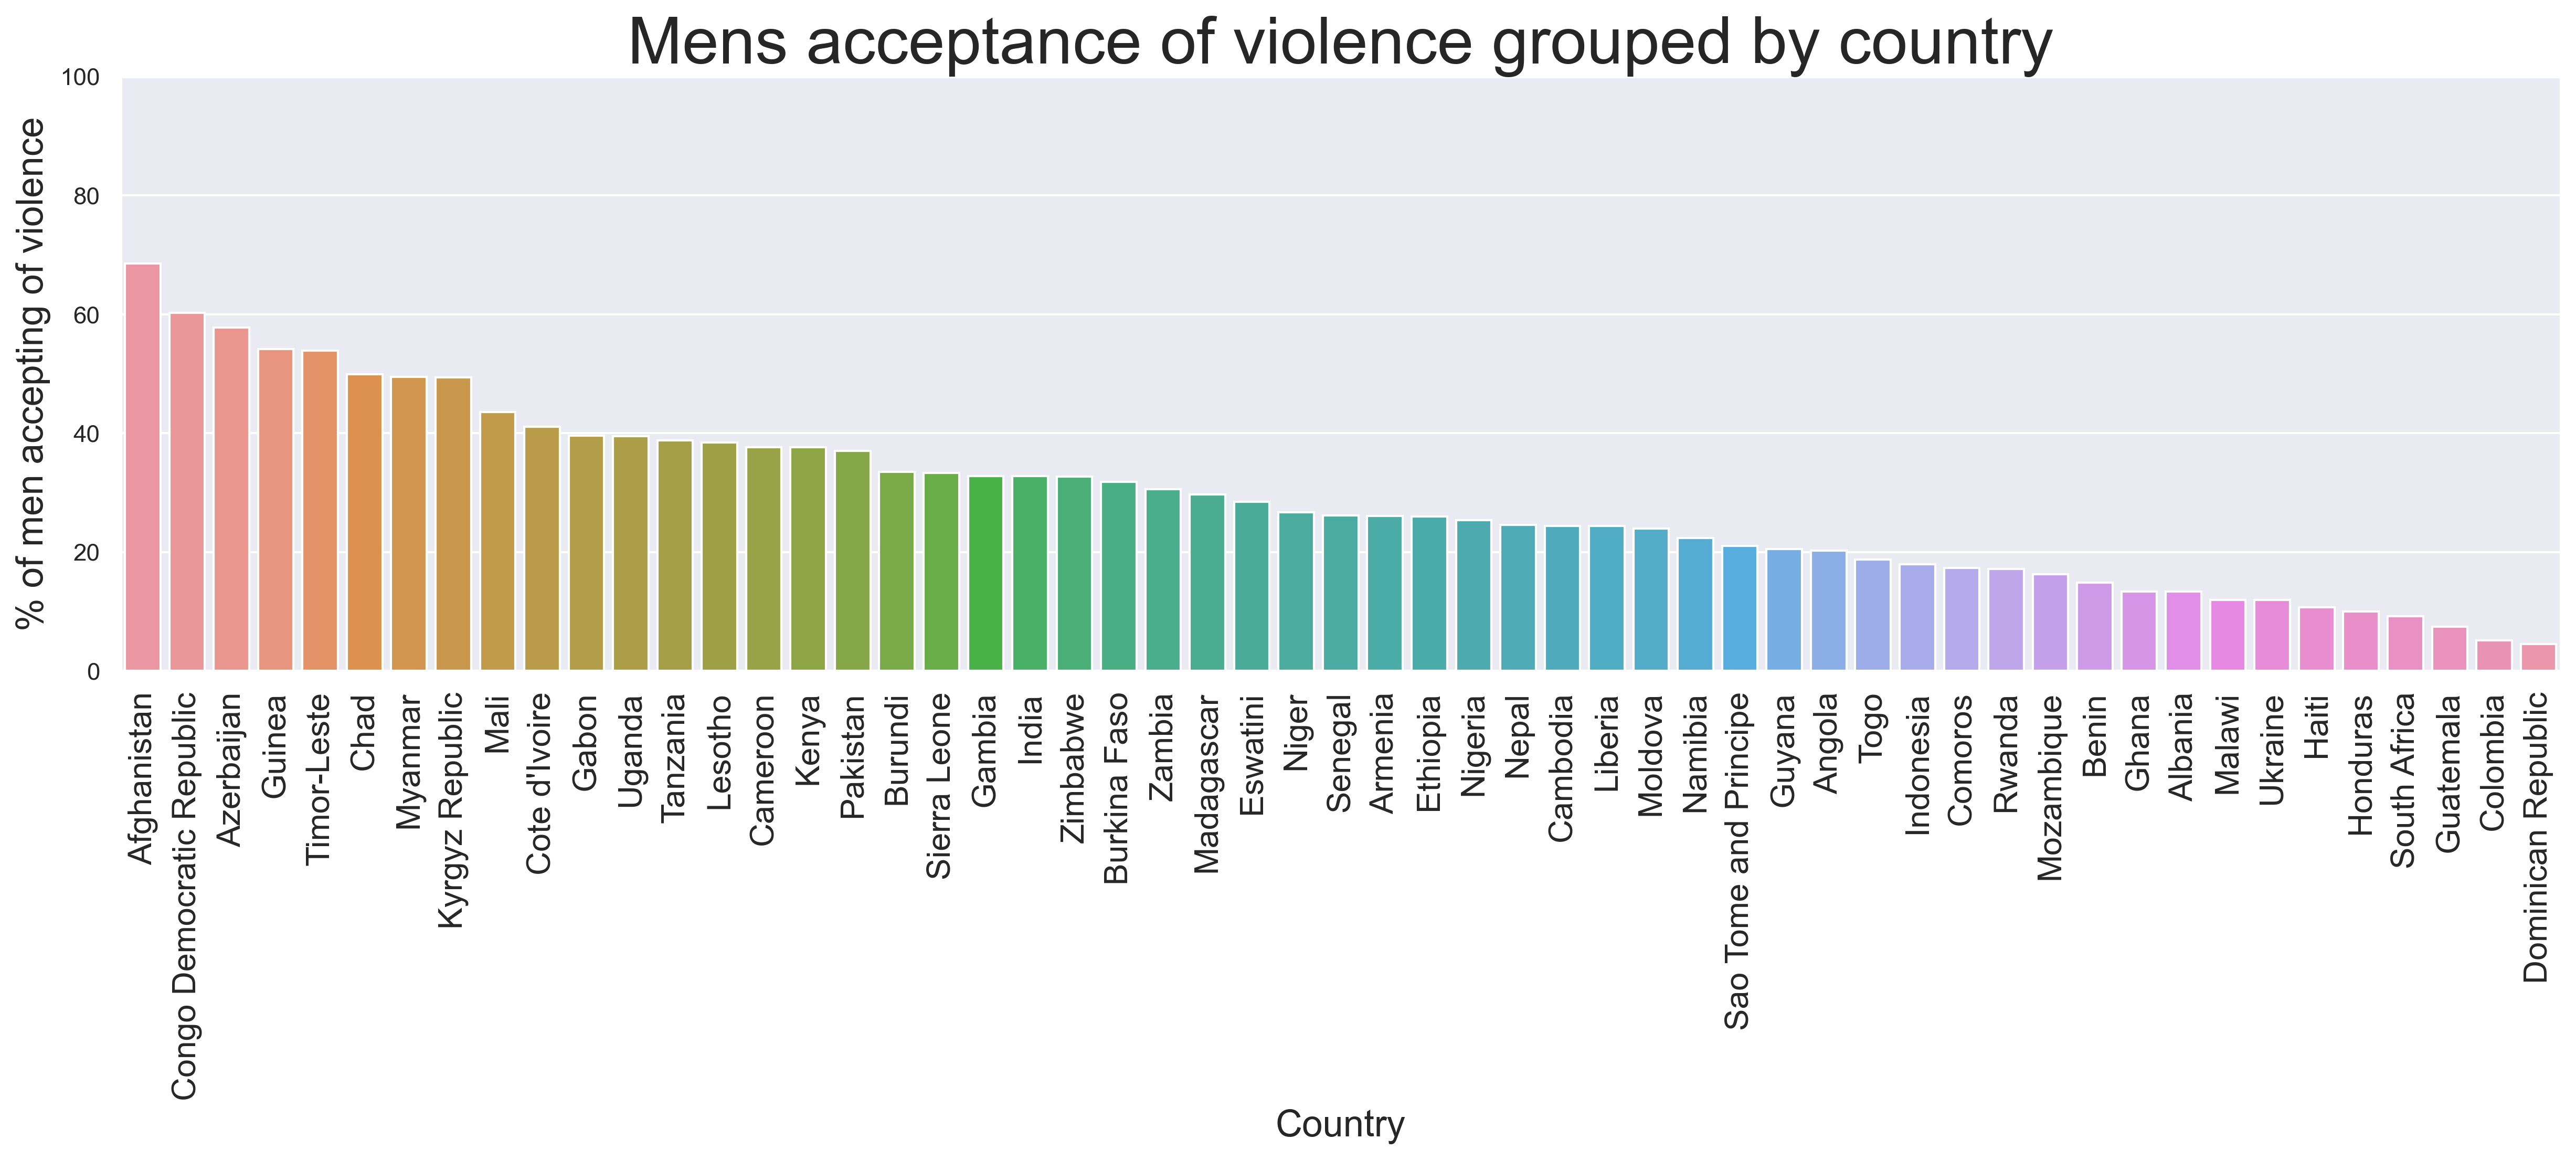

In [22]:
data = df[(df["Question"]  == "... for at least one specific reason") & (df["Gender"] == 0)].groupby("Country")["Value"].mean().reset_index()

data.head()
sort = data.sort_values(by=["Value"], ascending=False)

plt.figure(figsize=(20,5))
ax = sns.barplot(x="Country", y="Value", data=sort, ci=None)
plt.title("Mens acceptance of violence grouped by country", size="30");
plt.ylabel("% of men accepting of violence", size="17");
plt.ylim(0,100);
plt.xlabel("Country", size="17"); 
plt.xticks(rotation=90, size="15")
plt.show() 

In [63]:
d = df[(df["Question"]  == "... for at least one specific reason")].groupby("Country")["Value"].mean().reset_index()

countries = d[d["Value"] > 45]["Country"].unique()

countries.shape

demo =  df[(df["Question"]  == "... for at least one specific reason")].groupby(["Country", "Demographics Response", "Gender", "Demographics Question"])["Value"].mean().reset_index()
demo

response = demo["Demographics Response"].unique()
response

demo = demo[demo["Country"].isin(countries)]

demo.replace("Congo Democratic Republic", "Congo", inplace=True)

# Dropping Azerbaijan as they don't have values for men with these requirements
demo = demo[demo["Country"] != "Azerbaijan"]

plt.subplots(figsize=(25,100))

def plot_title(category, item):
    if category == "Age":
        return "Attitudes in age group " + item
    elif category == "Marital status":
        return "Attitudes of people " + item
    elif category == "Education":
        if "education" in item:
            return "Attitudes of people with " + item
        else: 
            return "Attitudes of people with " + item + " education"
    elif category == "Residence":
        return "Attitude of people living in " + item + " areas"
    elif category == "Employment":
        return "Attitudes of people " + item
    else:
        return "Categeory: " + category + " - group: " + item

for i, resp in enumerate(response):
    plt.subplot(len(response), 2, i+1)
    data = demo[demo["Demographics Response"] == resp].reset_index()
    ax = sns.barplot(x="Country", y="Value", hue="Gender", data=data, ci=None)
    demo_question = demo[demo["Demographics Response"] == resp]["Demographics Question"].unique()
    #ax.set_title("Attitudes of people living in " + resp + " areas")
    title = plot_title(demo_question, resp)
    ax.set_title(title)
    ax.set_ylim(0,100)
    plt.xlabel("% of people positive about violence")
    plt.xticks(rotation=90)
    plt.legend(labels=(["Male", "Female"]))
  

plt.subplots_adjust(hspace = 0.75)
plt.figure(figsize=(20,4))
plt.show()


<Figure size 6000x1200 with 0 Axes>

In [24]:
demo["Demographics Response"].unique()

array(['15-24', '25-34', '35-49', 'Employed for cash',
       'Employed for kind', 'Higher', 'Married or living together',
       'No education', 'Primary', 'Rural', 'Secondary', 'Unemployed',
       'Urban', 'Widowed, divorced, separated', 'Never married'],
      dtype=object)

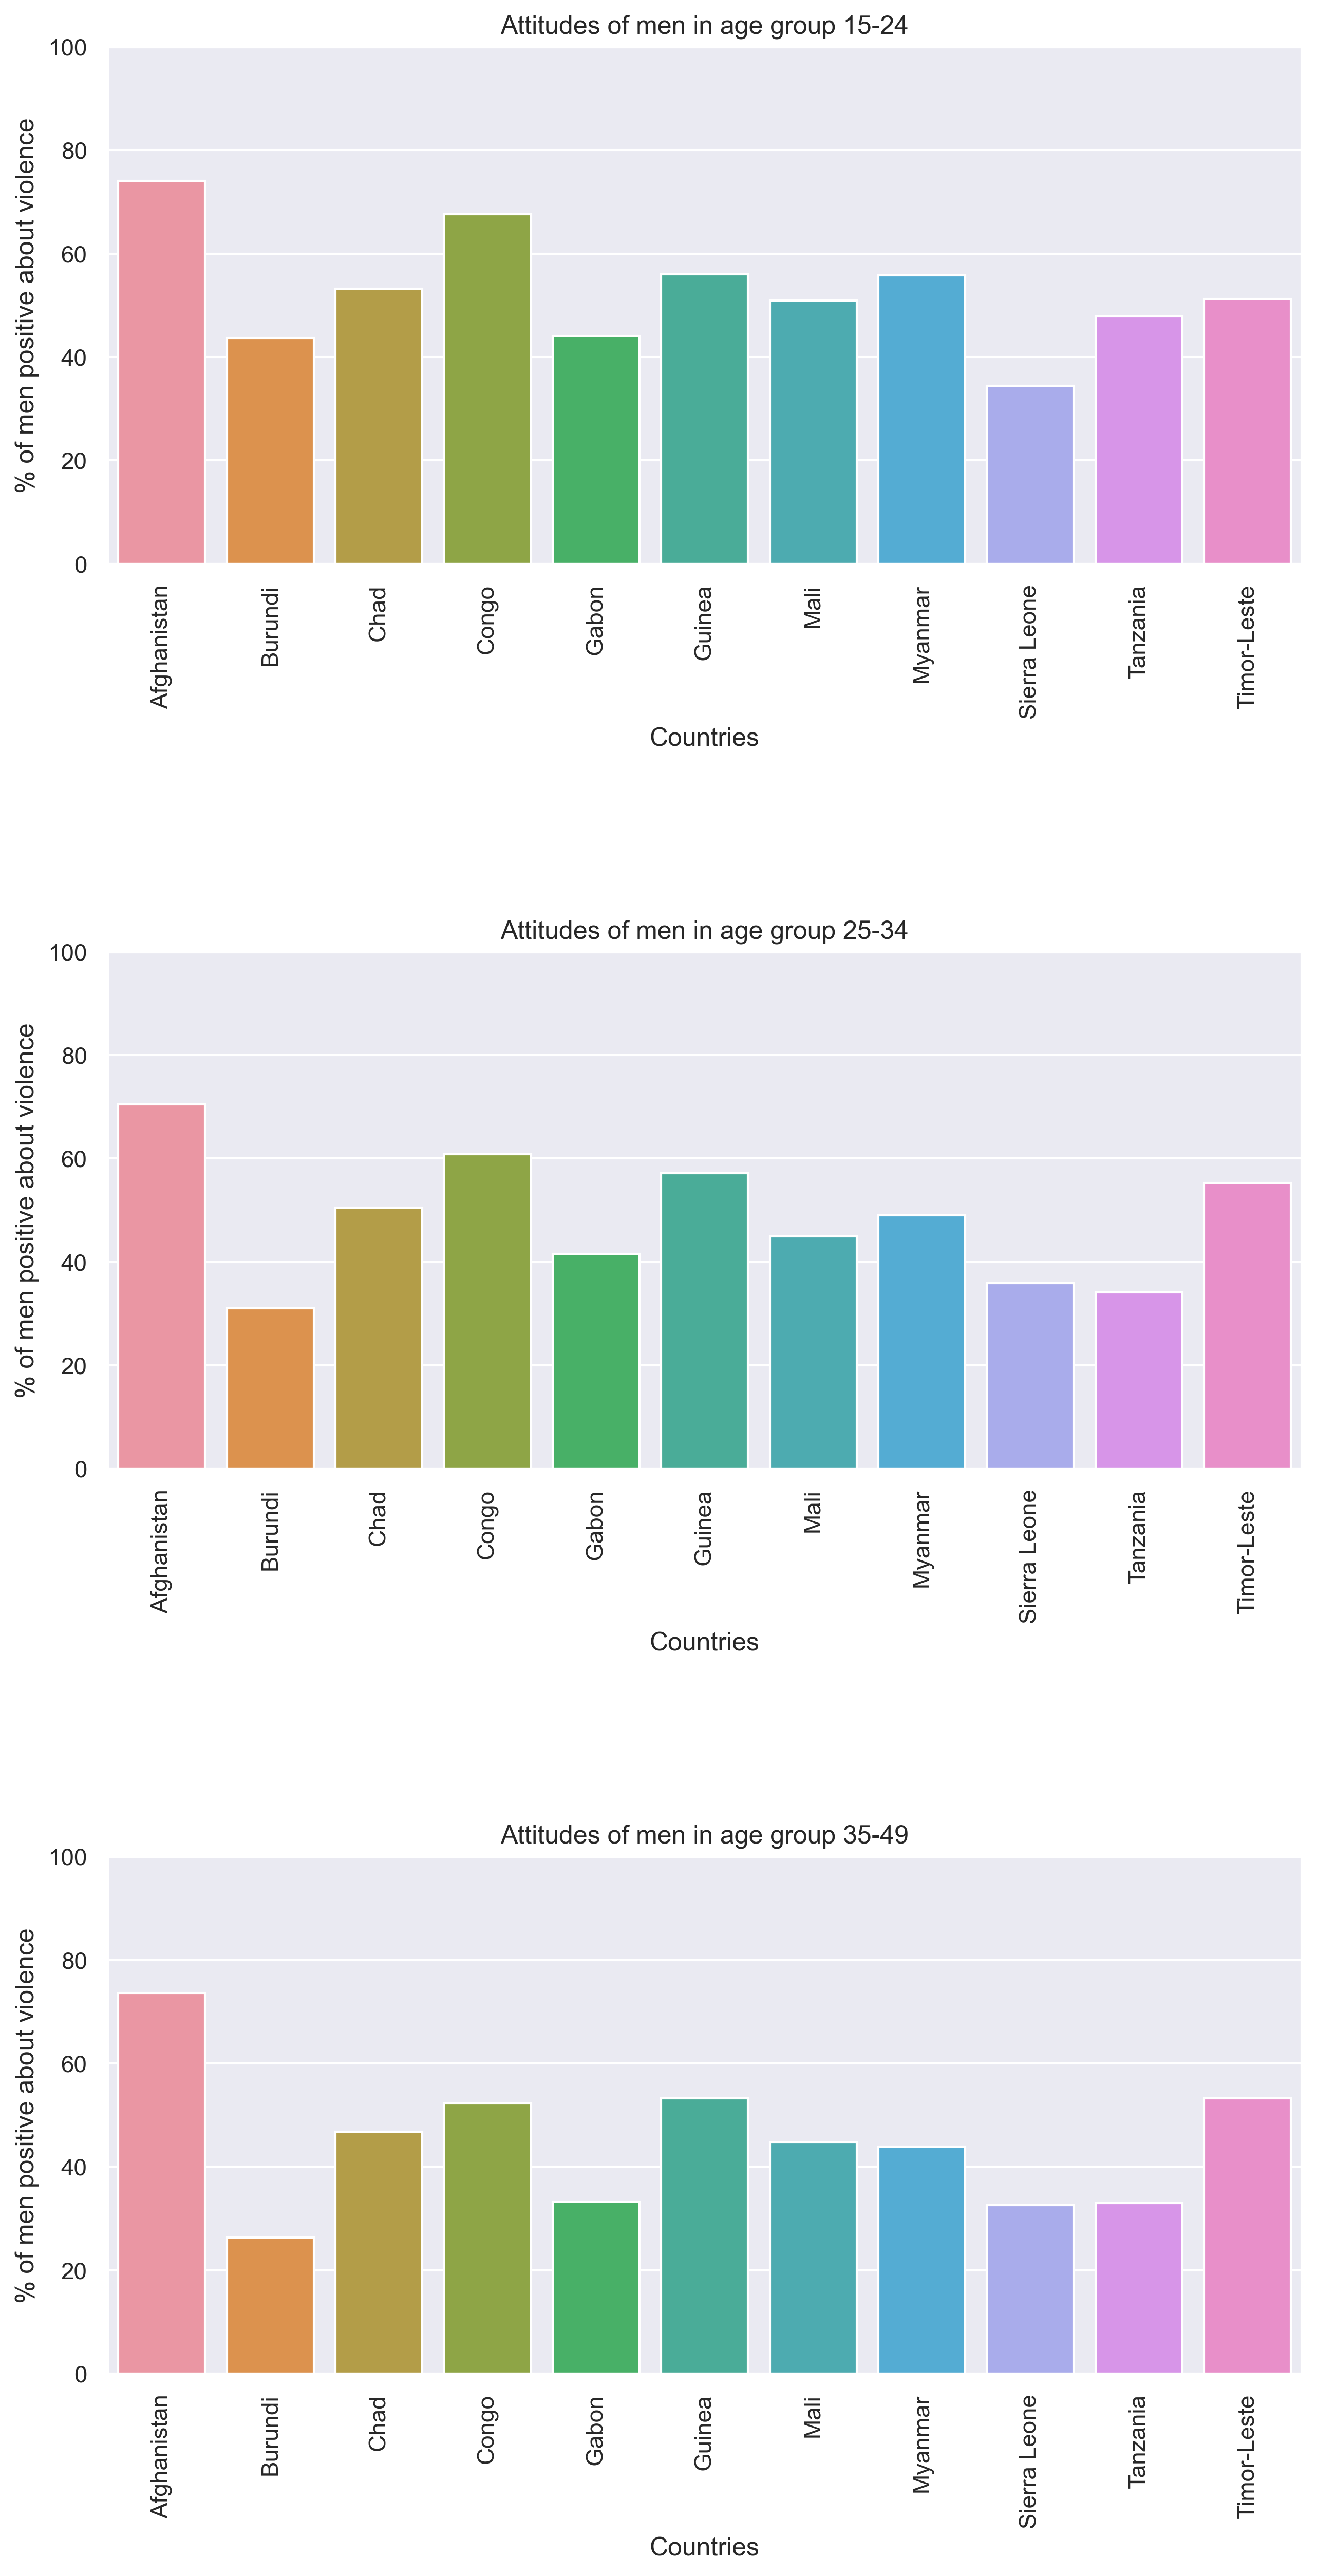

<Figure size 6000x1200 with 0 Axes>

In [25]:
response = ["15-24", "25-34", "35-49"]

plt.subplots(figsize=(10,20))

for i, resp in enumerate(response):
  plt.subplot(len(response), 1, i+1)
  
  data = demo[(demo["Demographics Response"] == resp) & (demo["Gender"] == 0)].reset_index()
  ax = sns.barplot(x="Country", y="Value", data=data, ci=None)
  ax.set_title("Attitudes of men in age group " + resp)
  ax.set_ylim(0,100)
  plt.ylabel("% of men positive about violence")
  plt.xlabel("Countries")
  plt.xticks(rotation=90)
  plt.legend("", frameon=False)
  
plt.subplots_adjust(hspace = 0.75)
plt.figure(figsize=(20,4))
plt.show()


Text(0, 0.5, '% positive to violence for any reason')

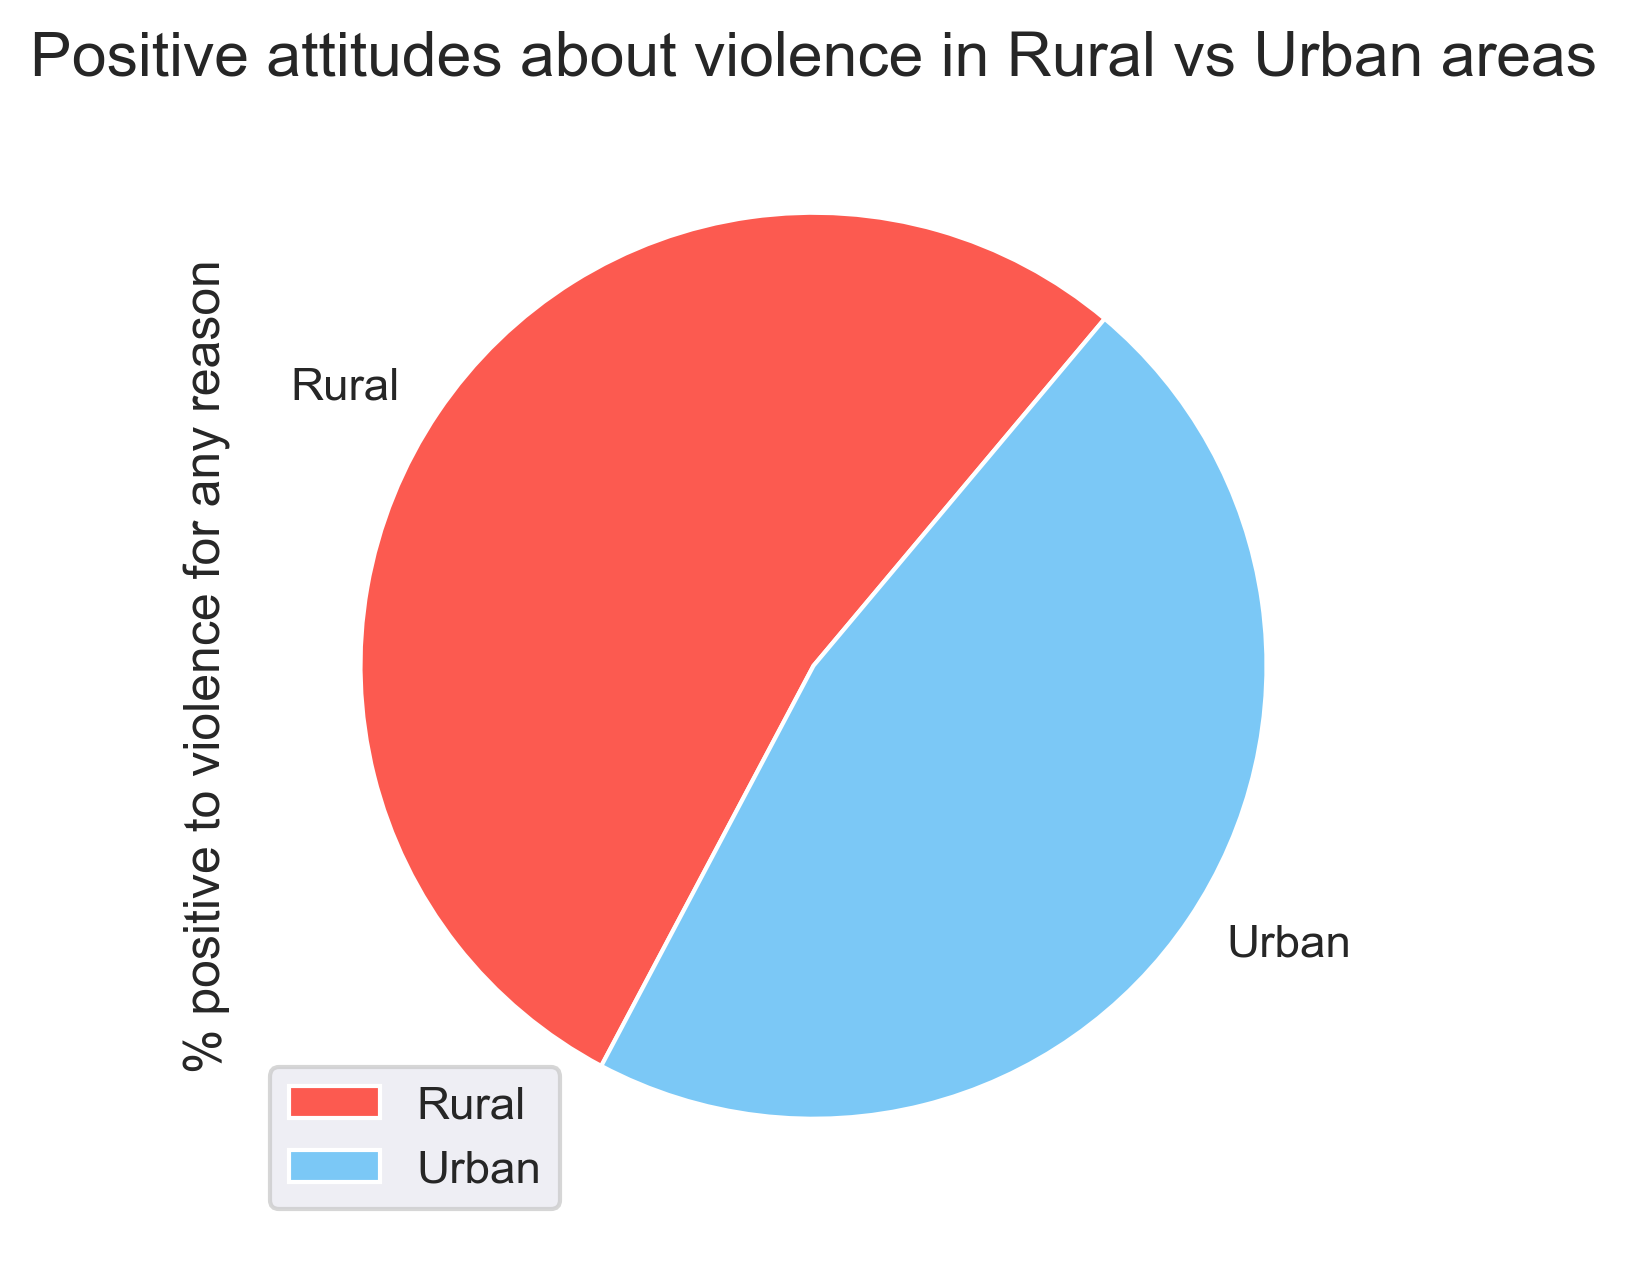

In [26]:
relevant_demographics_responses = ['Rural', 'Urban']
output = df[(df["Demographics Question"] == "Residence") & (df["Question"] == "... for at least one specific reason") & (df["Country"].isin(countries))]
resp = output.groupby(["Demographics Response"])["Value"].mean().reset_index()

resp = resp.set_index("Demographics Response")
resp.plot.pie(y='Value', figsize=(5, 5), startangle=50, colors=["xkcd:coral", "xkcd:lightblue"])
plt.title("Positive attitudes about violence in Rural vs Urban areas", size="15")
plt.ylabel("% positive to violence for any reason")


Text(0, 0.5, '')

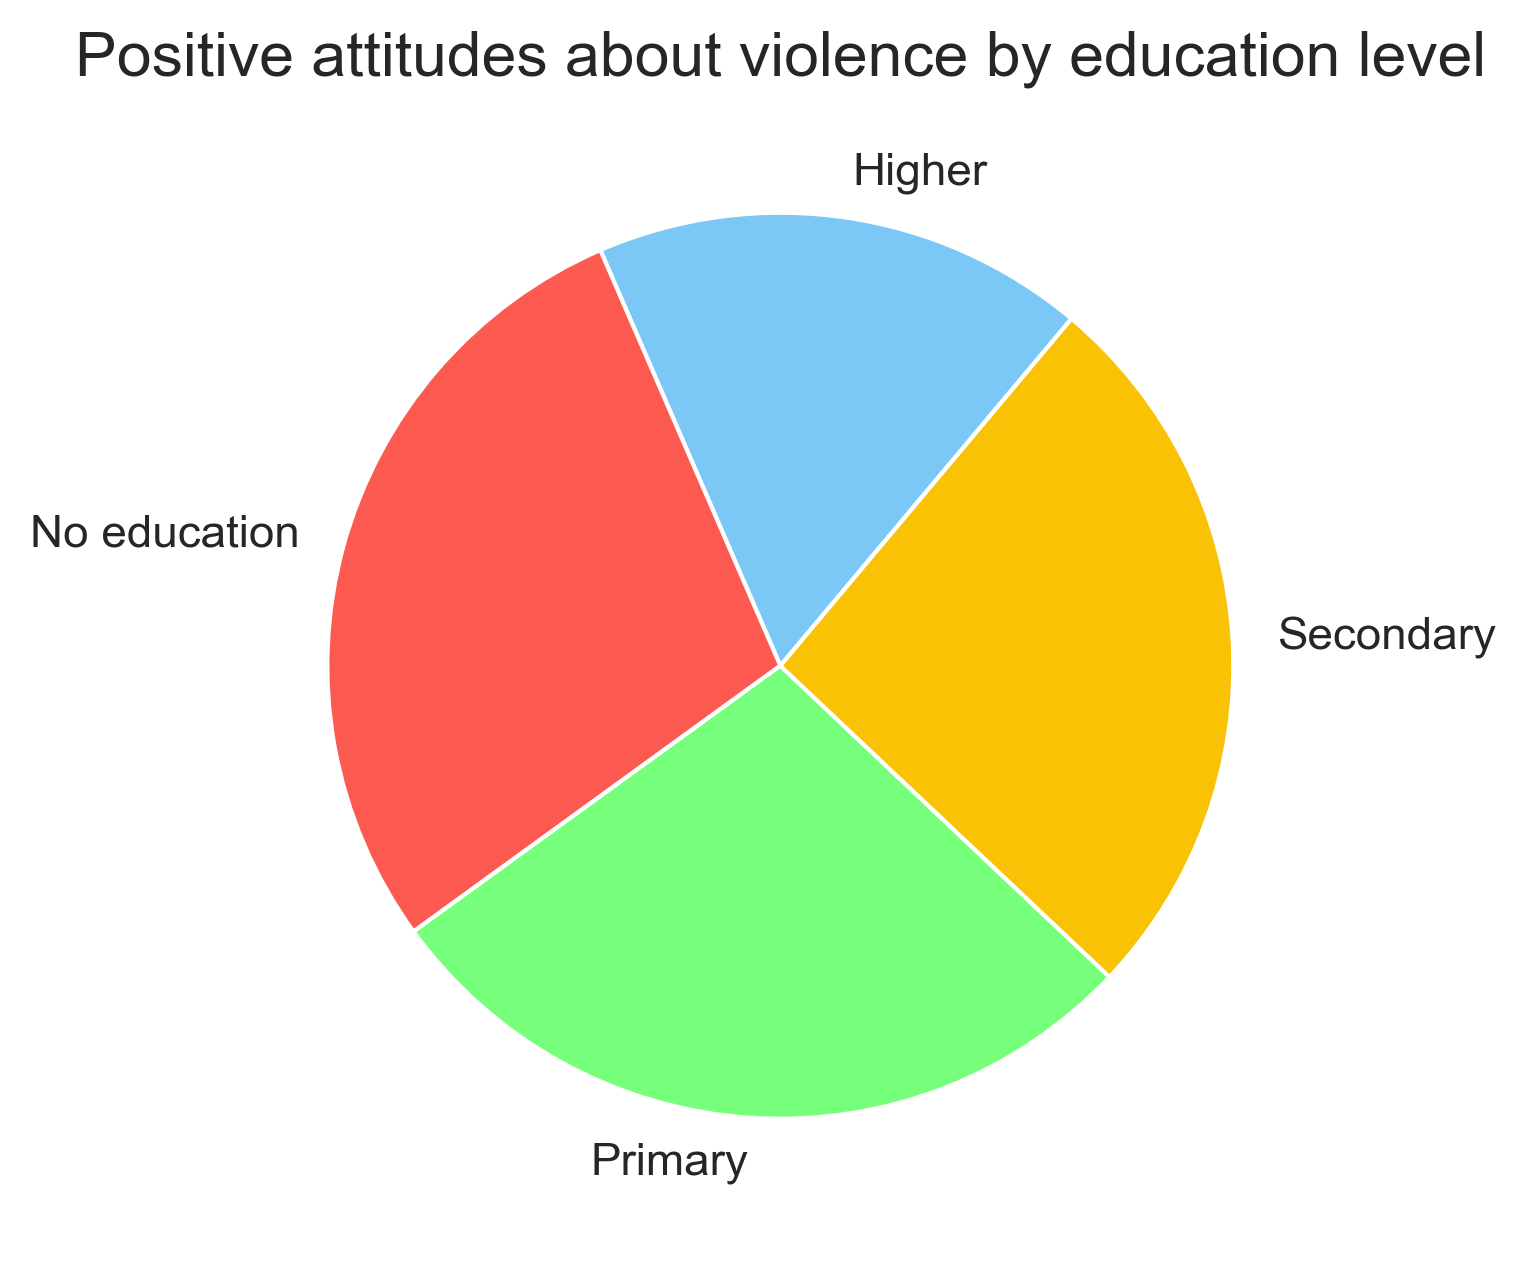

In [27]:
output = df[(df["Demographics Question"] == "Education") & (df["Question"] == "... for at least one specific reason") & (df["Country"].isin(countries))]
resp = output.groupby(["Demographics Response"])["Value"].mean().reset_index()

resp = resp.set_index("Demographics Response")
resp.plot.pie(y='Value', figsize=(5, 5), startangle=50, colors=[ "xkcd:lightblue", "xkcd:coral", "xkcd:lightgreen", "xkcd:goldenrod" ], legend=None)
plt.title("Positive attitudes about violence by education level", size="15")
plt.ylabel(None)


In [28]:
df[(df["Question"] == "... if she goes out without telling him") & (df["Gender"] == 1) & (df["Country"] == "Afghanistan")][["Country", "Demographics Question", "Demographics Response", "Value"]]

Country Demographics Question         Demographics Response  \
Survey Year                                                                    
2015-01-01   Afghanistan                   Age                         15-24   
2015-01-01   Afghanistan                   Age                         25-34   
2015-01-01   Afghanistan                   Age                         35-49   
2015-01-01   Afghanistan             Education                        Higher   
2015-01-01   Afghanistan             Education                  No education   
2015-01-01   Afghanistan             Education                       Primary   
2015-01-01   Afghanistan             Education                     Secondary   
2015-01-01   Afghanistan            Employment             Employed for cash   
2015-01-01   Afghanistan            Employment             Employed for kind   
2015-01-01   Afghanistan            Employment                    Unemployed   
2015-01-01   Afghanistan        Marital status    Married or living together   
2015-01-01   Afghanistan        Marital status  Widowed, divorced, separated   
2015-01-01   Afghanistan             Residence                         Rural   
2015-01-01   Afghanistan             Residence                         Urban   

             Value  
Survey Year         
2015-01-01    67.7  
2015-01-01    68.5  
2015-01-01    64.7  
2015-01-01    41.1  
2015-01-01    68.4  
2015-01-01    64.1  
2015-01-01    58.2  
2015-01-01    66.7  
2015-01-01    68.0  
2015-01-01    67.0  
2015-01-01    67.1  
2015-01-01    58.5  
2015-01-01    69.3  
2015-01-01    58.9

## Correlation plot of education related to attitiudes about violence

<AxesSubplot:>

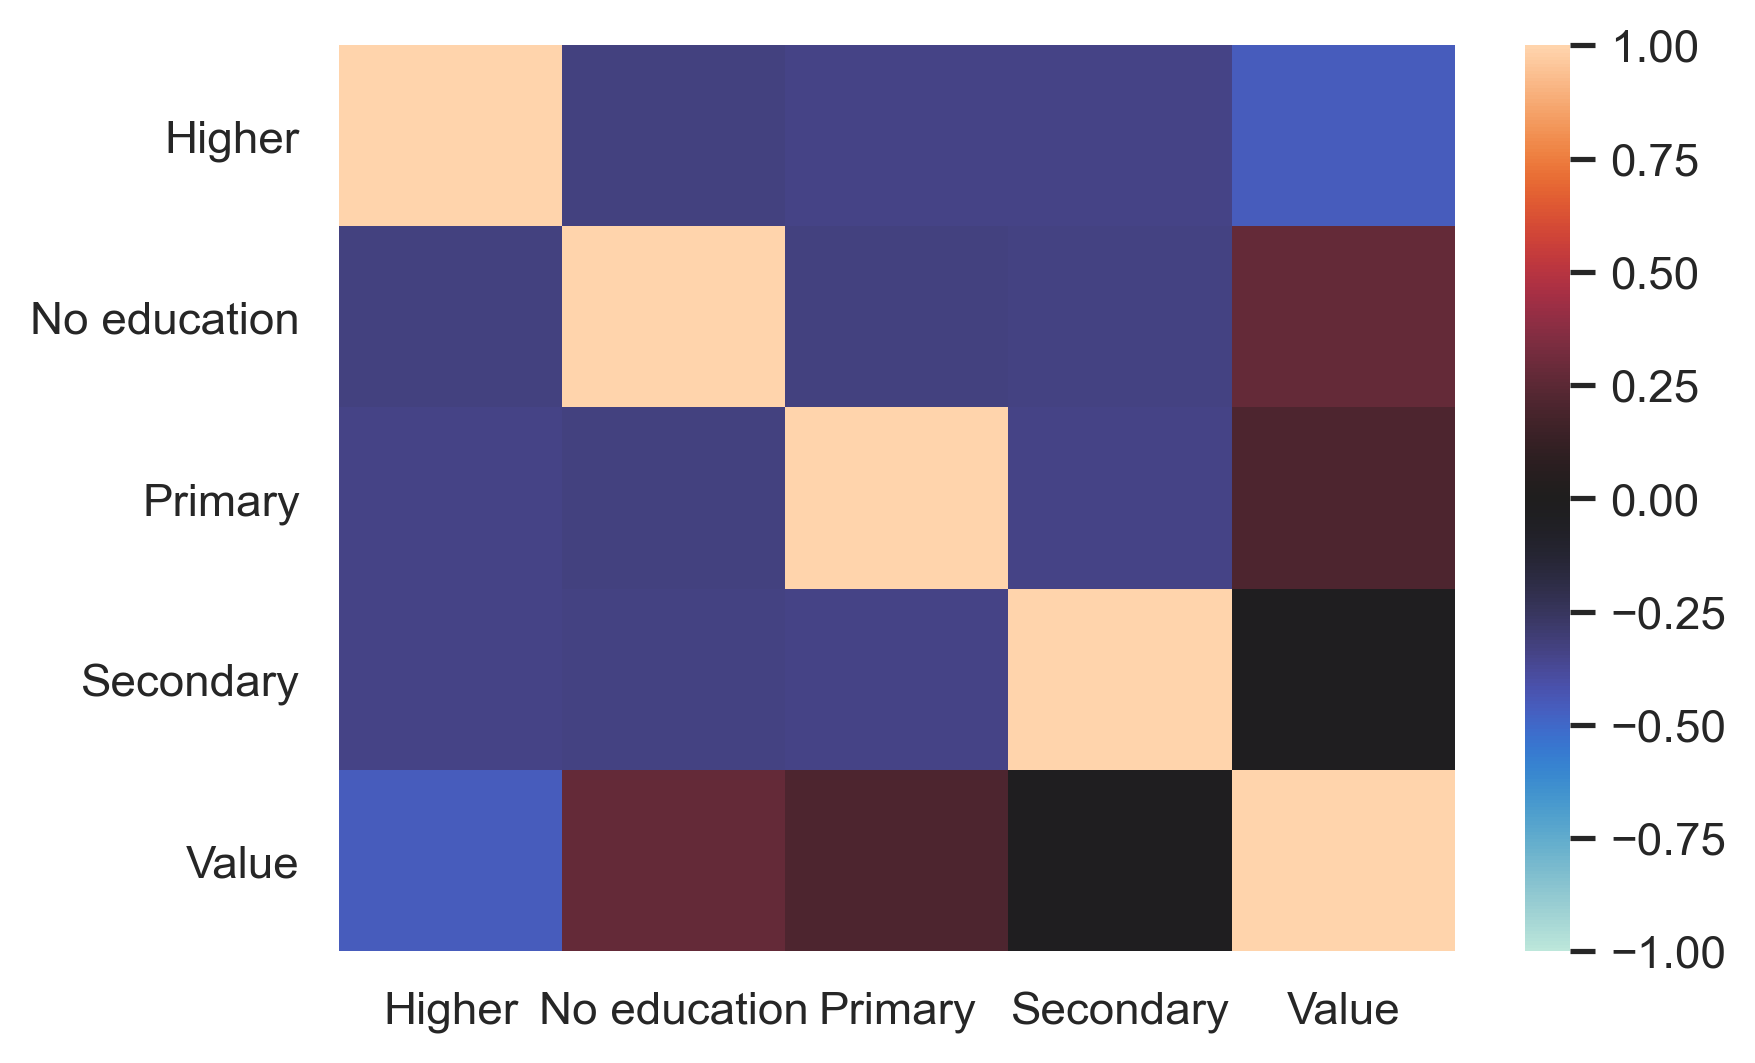

In [29]:
edu = df[((df["Demographics Question"] == "Education") & (df["Question"] == "... for at least one specific reason"))]
x = pd.get_dummies(edu["Demographics Response"])
x["Value"] = edu["Value"]
x["Gender"] = edu["Gender"]
fem = x[x["Gender"] == 1]
fem = fem.drop(columns=["Gender"])
femaleEdu = fem.corr(method="spearman")
sns.heatmap(femaleEdu, vmin=-1, vmax=1, center=0)

# Alcohol consumption

By looking at violence against women and girls it is relevant to look at factors outside the original dataset that is presented so far. Statcompiler is the data store for the DHS which provivdes more survey results than the initial dataset includes. A relevant topic which statcompiler covers, is alcohol consumption of the violater that the women reports. 

In [30]:
# Read data
df2 = pd.read_csv('https://raw.githubusercontent.com/Certinax/datasets/master/vawg/vawg-alcohol-consumption.csv', sep=';')
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Country                      92 non-null     object
 1   Survey                       92 non-null     object
 2   Does not drink               92 non-null     object
 3   Drinks but never gets drunk  71 non-null     object
 4   Gets drunk sometimes         83 non-null     object
 5   Gets drunk very often        81 non-null     object
dtypes: object(6)
memory usage: 4.4+ KB


All survey results that are available is numeric. Changing datatype to float to easilier work with the data. Empty fields will stay N/A since there are no resonable way to produce such data.

In [31]:
# Questions columns which is numeric values as object
questions = np.array(["Does not drink", "Drinks but never gets drunk", "Gets drunk sometimes", "Gets drunk very often"])

# Replace all delimeters from "," to ".", to let pandas to_numeric be able to interpret the values
df2[questions] = df2[questions].replace(",", ".", regex=True)

# Convert all objects to float64
df2[questions] = df2[questions].apply(pd.to_numeric)

# Validate transform
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Country                      92 non-null     object 
 1   Survey                       92 non-null     object 
 2   Does not drink               92 non-null     float64
 3   Drinks but never gets drunk  71 non-null     float64
 4   Gets drunk sometimes         83 non-null     float64
 5   Gets drunk very often        81 non-null     float64
dtypes: float64(4), object(2)
memory usage: 4.4+ KB


# Data cleaning

Have to validate countries, to only include the countries in the initial dataset.

In [32]:
# Include only countries that exists in original dataset
df2 = df2[df2["Country"].isin(df["Country"])]
df2.head()

Country       Survey  Does not drink  Drinks but never gets drunk  \
0   Afghanistan     2015 DHS            50.6                          NaN   
1        Angola  2015-16 DHS            22.5                         30.3   
2       Armenia  2015-16 DHS             3.7                          3.1   
3    Azerbaijan     2006 DHS             8.2                          NaN   
5  Burkina Faso     2010 DHS             8.7                          9.4   

   Gets drunk sometimes  Gets drunk very often  
0                  96.6                   95.8  
1                  45.5                   73.2  
2                  11.3                   54.0  
3                  13.1                   45.2  
5                  23.2                   33.9

The alcoholdata now only have countries in the initial dataset. Survey year is not a format that is easy to work with. Have to remove DHS and the year range where it occurs. Based on the survey years from the initial dataset, it is decided to only include the first year where survey year spans over two years. This is to have a more relevant mapping of the two datasets.

In [33]:
# Remove DHS and AIS from survey year
df2 = df2.replace("DHS", "", regex=True)
df2 = df2.replace("AIS", "", regex=True)


# Remove 20xx-20x(x+1) pattern to only only include the first year
# as it seems to match up with survey years from the VAWG dataset
df2 = df2.replace("-..", "", regex=True)

# Convert survey year to int
df2["Survey"] = df2["Survey"].apply(pd.to_numeric)


## Combine cleaned alcohol dataset with VAWG dataset

In [34]:
female = df[((df["Question"] == "... for at least one specific reason") & (df["Gender"] == 1))].groupby(["Country", "Survey"]).mean().reset_index()[["Country", "Survey","Value"]]
male = df[((df["Question"] == "... for at least one specific reason") & (df["Gender"] == 0))].groupby(["Country", "Survey"]).mean().reset_index()[["Country","Value"]]
male
combi = pd.merge(female, male, on = 'Country', how = 'inner')
combi = combi.rename(columns={"Value_x": "Female", "Value_y": "Male"})
combi["Survey"] = combi["Survey"].apply(pd.to_numeric)
combi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55 entries, 0 to 54
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Country  55 non-null     object 
 1   Survey   55 non-null     int64  
 2   Female   55 non-null     float64
 3   Male     55 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 2.1+ KB


In [35]:
new_df = pd.merge(combi, df2,  how='left', left_on=['Country','Survey'], right_on = ['Country','Survey'])


In [36]:
#dropped rows that have no answers for drinking
filtered = new_df.dropna(axis=0, thresh=5)

In [37]:
#strong correlation between attitudes of women and men
x = filtered.drop(columns=['Survey'])
corr= x.corr()
np.fill_diagonal(corr.values, np.nan)
corr

Female      Male  Does not drink  \
Female                            NaN  0.820708        0.631459   
Male                         0.820708       NaN        0.506428   
Does not drink               0.631459  0.506428             NaN   
Drinks but never gets drunk  0.516966  0.356024        0.854894   
Gets drunk sometimes         0.621420  0.501395        0.887624   
Gets drunk very often        0.332006  0.247205        0.727755   

                             Drinks but never gets drunk  \
Female                                          0.516966   
Male                                            0.356024   
Does not drink                                  0.854894   
Drinks but never gets drunk                          NaN   
Gets drunk sometimes                            0.836439   
Gets drunk very often                           0.654160   

                             Gets drunk sometimes  Gets drunk very often  
Female                                   0.621420               0.332006  
Male                                     0.501395               0.247205  
Does not drink                           0.887624               0.727755  
Drinks but never gets drunk              0.836439               0.654160  
Gets drunk sometimes                          NaN               0.796125  
Gets drunk very often                    0.796125                    NaN

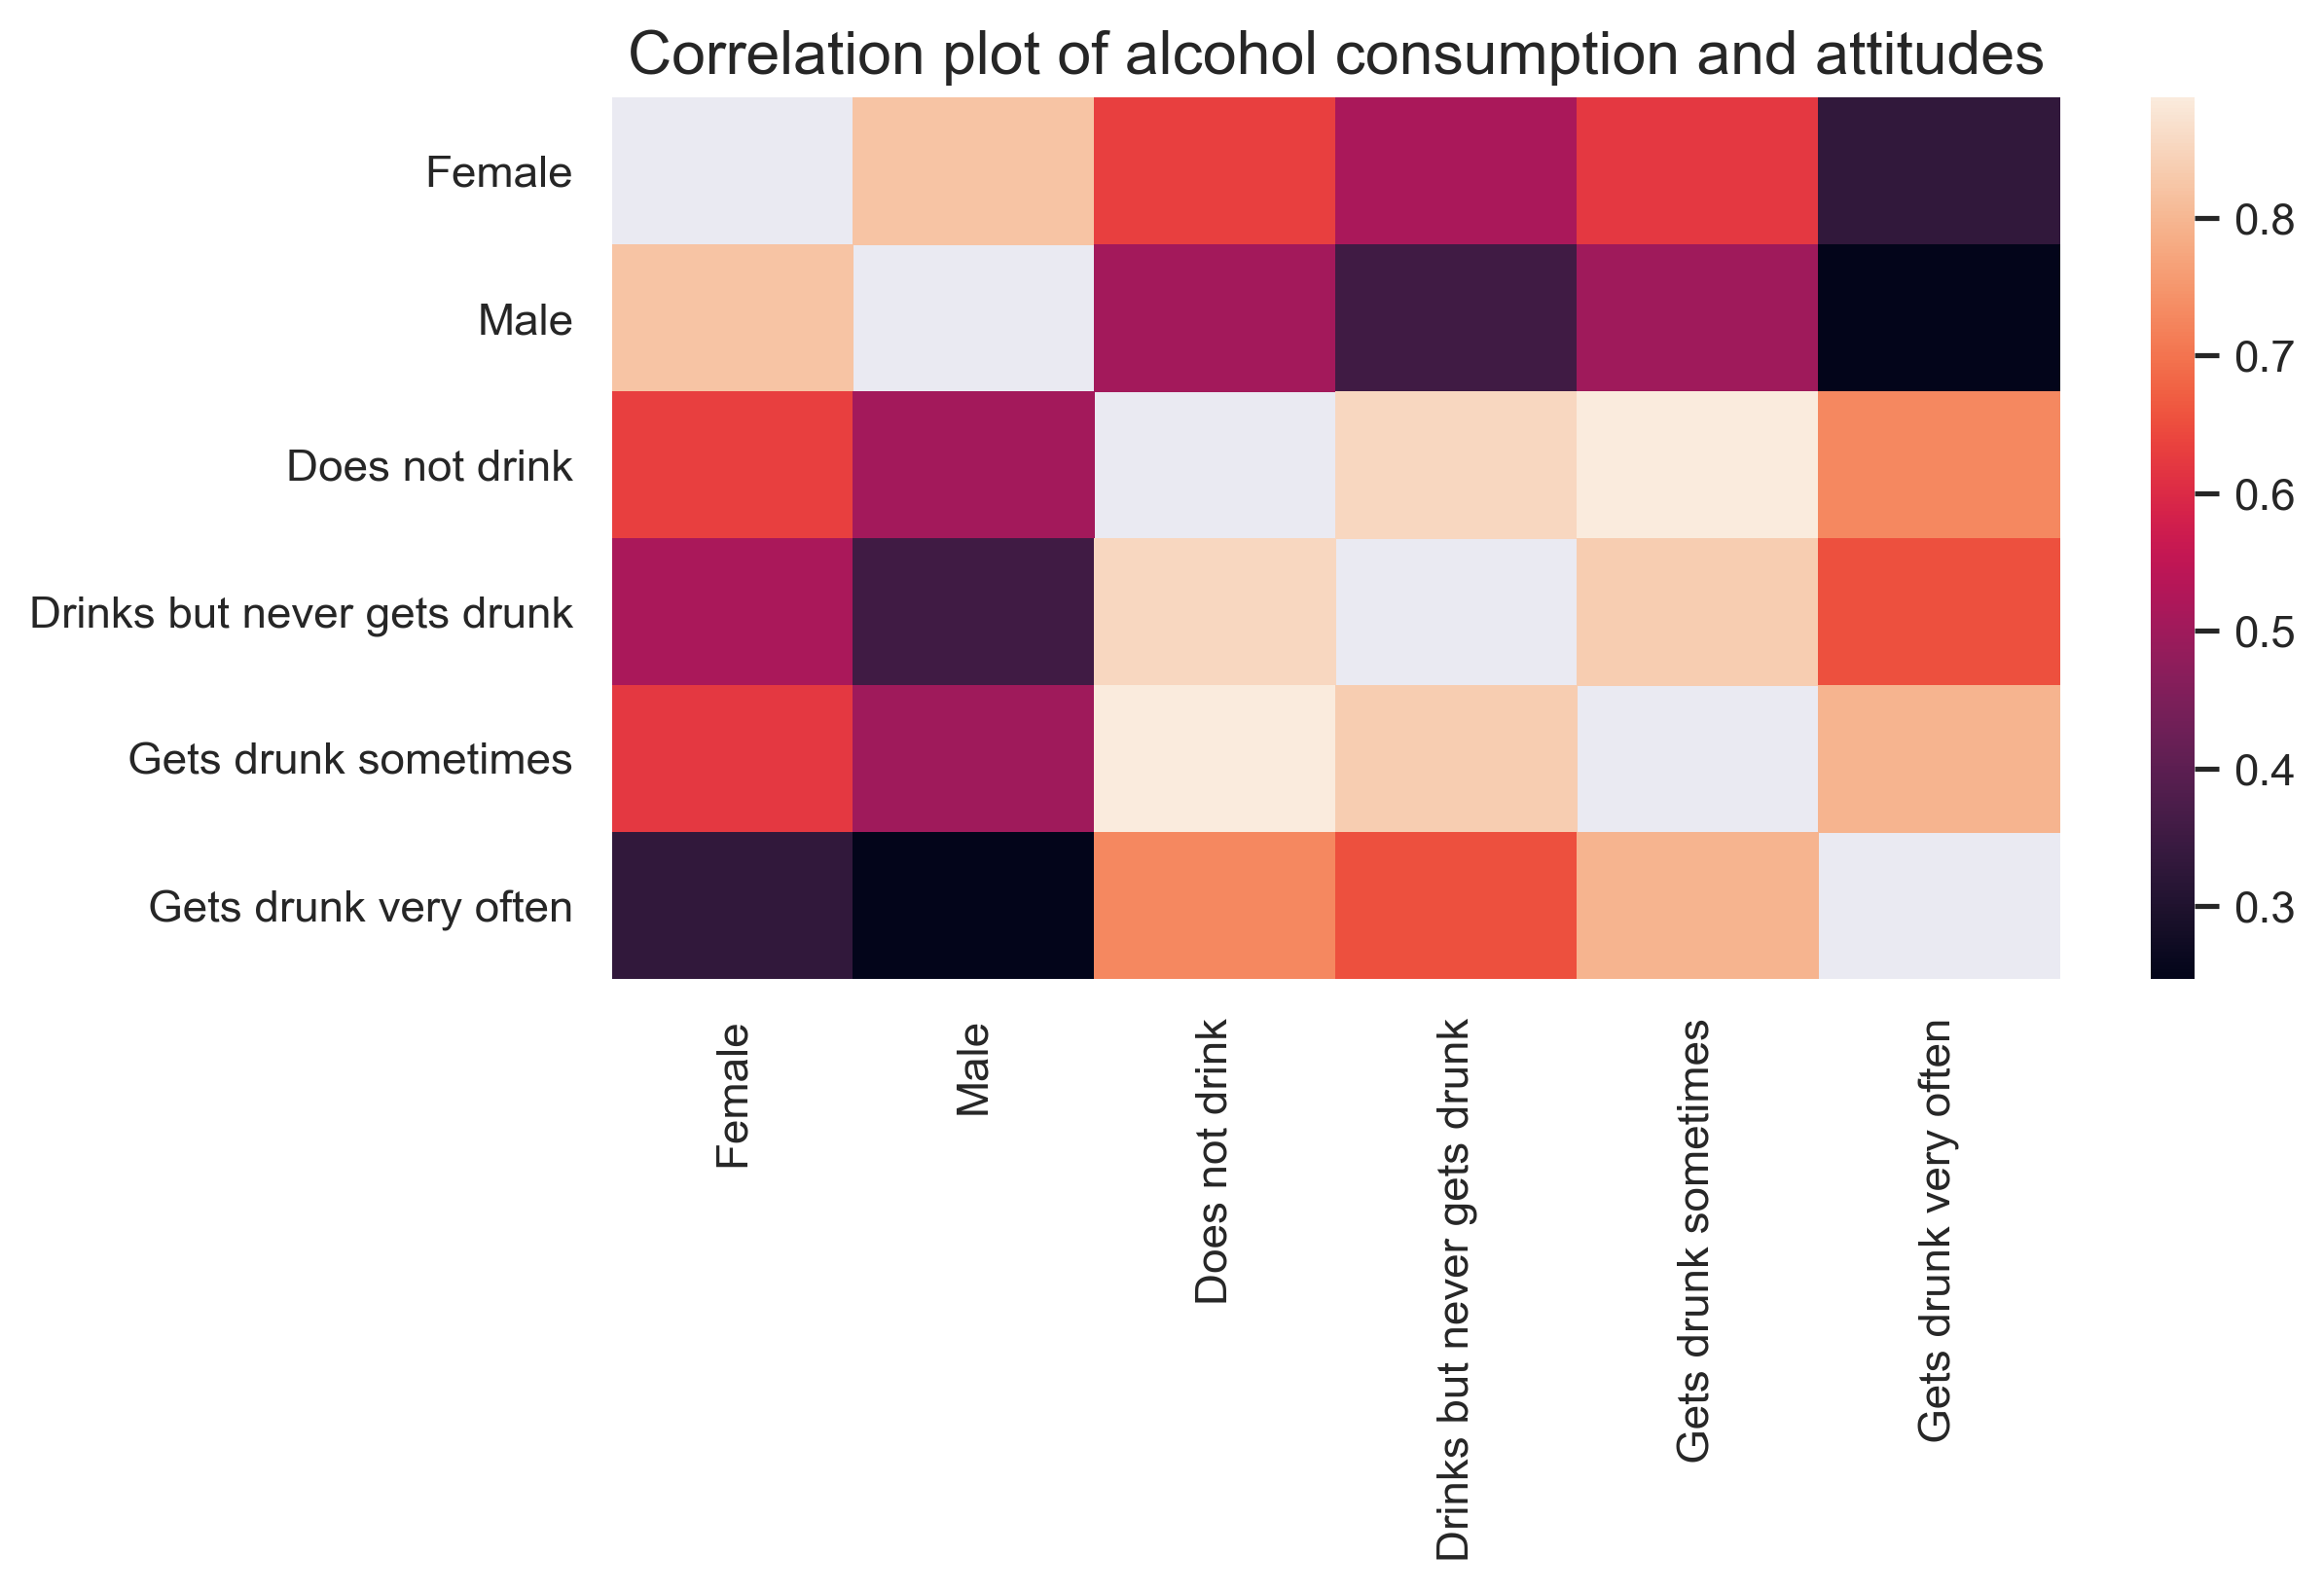

In [38]:
plt.figure(figsize=(8,4))
sns.heatmap(corr)
plt.title("Correlation plot of alcohol consumption and attitudes", size=15)
plt.show()
# Correlation plot showing the correlation between the different features of the dataset.
# The lighter the collor the stronger the correlation between features. 
# The diagonal have been removed as a features correlation to itself always is one. 
# We can tell that there is a strong correlation between the different anwers to 

#Feature - Variable in the dataset representing a datapoint